In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import *
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#Install Libraries

In [2]:
#Randomly Generate Data:

Feat, Class = make_gaussian_quantiles(cov=3., n_samples=150, n_features=2, n_classes=3, random_state=25) #Randomly Generate data according to precepts  
df = [pd.DataFrame(Feat,columns=['Feature 1','Feature 2']), pd.DataFrame(Class, columns=['Class'])] #Fit into Dataframe with columns
Q2_Data = pd.concat(df, axis=1)

print('Question 2 Data:', '\n', Q2_Data)

print('N.o Classes in Dataset:', '\n', Q2_Data['Class'].value_counts()) #Counts n.o classes


Question 2 Data: 
      Feature 1  Feature 2  Class
0    -1.284992  -2.701857      2
1    -0.146694   3.407928      2
2     2.933870  -2.221882      2
3    -2.992384   1.323404      2
4     0.692356   0.702306      0
..         ...        ...    ...
145   0.207639   1.109589      0
146  -3.556300   1.504430      2
147   0.159976   1.941648      1
148  -3.417105  -2.193016      2
149   2.390251  -3.757399      2

[150 rows x 3 columns]
N.o Classes in Dataset: 
 0    50
1    50
2    50
Name: Class, dtype: int64


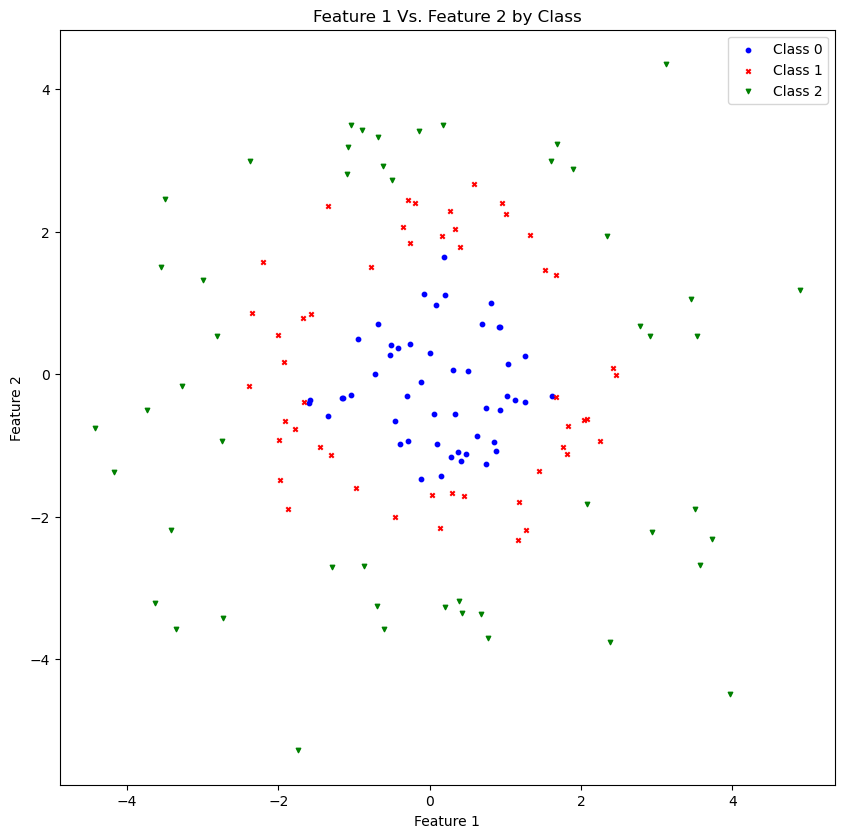

In [3]:
#Scatter plot:

idx_0 = np.where(Q2_Data['Class'] == 0) #Set Index per class
idx_1 = np.where(Q2_Data['Class'] == 1)
idx_2 = np.where(Q2_Data['Class'] == 2)

plt.figure(figsize=(10,10),dpi=100) #Figure size
plt.scatter(Q2_Data['Feature 1'].iloc[idx_0], Q2_Data['Feature 2'].iloc[idx_0], s=10, c='b', marker="o", label='Class 0')
plt.scatter(Q2_Data['Feature 1'].iloc[idx_1], Q2_Data['Feature 2'].iloc[idx_1], s=10, c='r', marker="x", label='Class 1')
plt.scatter(Q2_Data['Feature 1'].iloc[idx_2], Q2_Data['Feature 2'].iloc[idx_2], s=10, c='g', marker="v", label='Class 2')

plt.xlabel('Feature 1') #Set graph data
plt.ylabel('Feature 2')
plt.title('Feature 1 Vs. Feature 2 by Class')
plt.legend()
plt.show()

In [4]:
#Training and Testing set generation

x_train, x_test, y_train, y_test = train_test_split(Q2_Data.drop(['Class'], axis=1), Q2_Data['Class'], test_size=0.50, random_state=25)

print('Training Data:', '\n', x_train, y_train)
print('Testing Data:', '\n', x_test, y_test)

Training Data: 
      Feature 1  Feature 2
44   -0.687033   0.702494
105  -1.086781   2.808000
67    1.003699   2.254305
142   0.307529   0.055935
96    0.502036   0.041939
..         ...        ...
118  -0.455881  -0.655209
61   -0.515746   0.403089
143  -0.255331   1.841384
62    1.673663  -0.315743
132  -1.140350  -0.339524

[75 rows x 2 columns] 44     0
105    2
67     1
142    0
96     0
      ..
118    0
61     0
143    1
62     1
132    0
Name: Class, Length: 75, dtype: int32
Testing Data: 
      Feature 1  Feature 2
28    2.917372   0.528554
72   -1.297640  -1.132616
70   -1.923817   0.171632
85   -4.176670  -1.377689
128  -3.738463  -0.501013
..         ...        ...
9    -1.587406  -0.367451
24   -3.276312  -0.168585
144   1.811976  -1.118531
63   -3.631404  -3.219322
75   -0.301047  -0.304859

[75 rows x 2 columns] 28     2
72     1
70     1
85     2
128    2
      ..
9      0
24     2
144    1
63     2
75     0
Name: Class, Length: 75, dtype: int32


In [5]:
#Linear SVM:

tuned_parameters_lin = [{"kernel": ["linear"], "gamma": [1,1e-1,1e-2,1e-3, 1e-4], "C": [1, 10, 100,1000]}] #Sets SVM type
svmClassifier = GridSearchCV(SVC(), tuned_parameters_lin, scoring='accuracy',cv=5) #Sets cv value
svmClassifier.fit(x_train, y_train) #Fits model to training data
print("Optimal parameters for training set:", '\n', svmClassifier.best_params_) #Outputs optimal parameters 
print("Summary data for training set:")
for mean, std, params in zip(svmClassifier.cv_results_["mean_test_score"], svmClassifier.cv_results_["std_test_score"], svmClassifier.cv_results_["params"]): #Iterates loops on parameters
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Optimal parameters for training set: 
 {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Summary data for training set:
0.560 (+/-0.053) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 10, 'gamma': 1, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 100, 'gamma': 1, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 100, 'gamma': 0.1, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}
0.560 (+/-0.053) for {'C': 100, 'gamma'

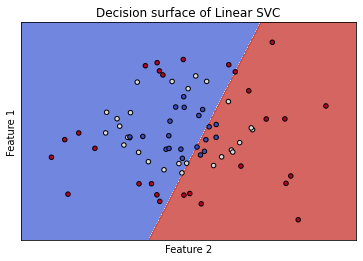

In [6]:
#Plot Linear SVM:

##WARNING: THIS CELL HAS A RUN TIME OF AROUND 1 MINUTE

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

xx, yy = make_meshgrid(x_test['Feature 1'], x_test['Feature 2']) #Makes recalling function easier

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots() # title for the plots
title = ('Decision surface of Linear SVC') # Set-up grid for plotting.
plot_contours(ax, svmClassifier.fit(x_test, y_test), xx, yy , cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x_test['Feature 1'], x_test['Feature 2'], c=y_test, marker="o", cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Feature 1')
ax.set_xlabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

In [7]:
#Linear SVM summary statistics

y_pred_svm = svmClassifier.predict(x_test) #Takes the output of the SVM from the training set
y_true, y_pred = y_test, y_pred_svm
print(classification_report(y_true, y_pred_svm)) #Prints summary table
sum(y_pred_svm==y_test)/len(y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.38      0.69      0.49        26
           2       0.44      0.43      0.44        28

    accuracy                           0.40        75
   macro avg       0.27      0.37      0.31        75
weighted avg       0.30      0.40      0.33        75



C:\Users\Arif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4

In [8]:
##Polynomial SVM:

#WARNING: THIS CELL HAS A RUN TIME OF AROUND 1 MINUTE

tuned_parameters_poly = [{"kernel": ["poly"], "gamma": [1,1e-1,1e-2,1e-3, 1e-4], "C": [1, 10, 100,1000]}]
svmClassifier = GridSearchCV(SVC(), tuned_parameters_poly, scoring='accuracy',cv=5)
svmClassifier.fit(x_train, y_train)
print("Optimal parameters for training set:", '\n', svmClassifier.best_params_)
print("Summary data for training set:")
for mean, std, params in zip(svmClassifier.cv_results_["mean_test_score"], svmClassifier.cv_results_["std_test_score"], svmClassifier.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Optimal parameters for training set: 
 {'C': 100, 'gamma': 0.1, 'kernel': 'poly'}
Summary data for training set:
0.547 (+/-0.078) for {'C': 1, 'gamma': 1, 'kernel': 'poly'}
0.440 (+/-0.033) for {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.387 (+/-0.027) for {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.387 (+/-0.027) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.387 (+/-0.027) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.560 (+/-0.068) for {'C': 10, 'gamma': 1, 'kernel': 'poly'}
0.520 (+/-0.027) for {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
0.387 (+/-0.027) for {'C': 10, 'gamma': 0.01, 'kernel': 'poly'}
0.387 (+/-0.027) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.387 (+/-0.027) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
0.560 (+/-0.068) for {'C': 100, 'gamma': 1, 'kernel': 'poly'}
0.587 (+/-0.065) for {'C': 100, 'gamma': 0.1, 'kernel': 'poly'}
0.427 (+/-0.033) for {'C': 100, 'gamma': 0.01, 'kernel': 'poly'}
0.387 (+/-0.027) for {'C': 100, 'gamma': 0.001, 'kernel': 'poly

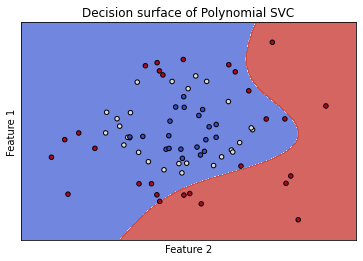

In [9]:
#Plot Polynomial SVM

#WARNING: THIS CELL HAS A RUN TIME OF AROUND 1 MINUTE

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

xx, yy = make_meshgrid(x_test['Feature 1'], x_test['Feature 2'])

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
title = ('Decision surface of Polynomial SVC')
plot_contours(ax, svmClassifier.fit(x_test, y_test), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x_test['Feature 1'], x_test['Feature 2'], c=y_test, marker="o", cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Feature 1')
ax.set_xlabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

In [10]:
#Polynomial SVM summary statistics

y_pred_svm = svmClassifier.predict(x_test)
y_true, y_pred = y_test, y_pred_svm
print(classification_report(y_true, y_pred_svm))
sum(y_pred_svm==y_test)/len(y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.39      1.00      0.56        26
           2       1.00      0.29      0.44        28

    accuracy                           0.45        75
   macro avg       0.46      0.43      0.33        75
weighted avg       0.51      0.45      0.36        75



C:\Users\Arif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arif\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4533333333333333

In [11]:
#Radial Basis Function (RBF) SVC

tuned_parameters_rbf = [{"kernel": ["rbf"], "gamma": [1,1e-1,1e-2,1e-3, 1e-4], "C": [1, 10, 100,1000]}]
svmClassifier = GridSearchCV(SVC(), tuned_parameters_rbf, scoring='accuracy',cv=5)
svmClassifier.fit(x_train, y_train)
print("Optimal parameters for training set:", '\n', svmClassifier.best_params_) 
print("Summary data for training set:")
for mean, std, params in zip(svmClassifier.cv_results_["mean_test_score"], svmClassifier.cv_results_["std_test_score"], svmClassifier.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

Optimal parameters for training set: 
 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Summary data for training set:
0.933 (+/-0.073) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.920 (+/-0.065) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.413 (+/-0.050) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.387 (+/-0.027) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.387 (+/-0.027) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.933 (+/-0.060) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.933 (+/-0.060) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.733 (+/-0.060) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.400 (+/-0.042) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.387 (+/-0.027) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.933 (+/-0.060) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.907 (+/-0.053) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.907 (+/-0.053) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.547 (+/-0.065) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.400 (+/-0.042)

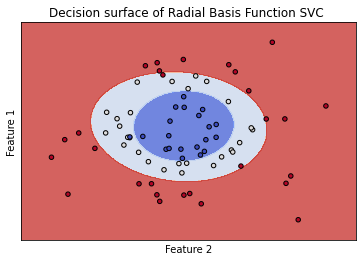

In [12]:
#Plot RBF SVM

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

xx, yy = make_meshgrid(x_test['Feature 1'], x_test['Feature 2'])

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
title = ('Decision surface of Radial Basis Function SVC ')
plot_contours(ax, svmClassifier.fit(x_test, y_test), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x_test['Feature 1'], x_test['Feature 2'], c=y_test, marker="o", cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Feature 1')
ax.set_xlabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

In [13]:
#RBF SVM summary statistics

y_pred_svm = svmClassifier.predict(x_test)
y_true, y_pred = y_test, y_pred_svm
print(classification_report(y_true, y_pred_svm))
sum(y_pred_svm==y_test)/len(y_test)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.87      1.00      0.93        26
           2       1.00      0.93      0.96        28

    accuracy                           0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



0.9466666666666667